We first need to read in the data and see how it looks like

In [9]:
# please make sure that the data is located in the data folder under the current sirectory where you put your file

# first we should import all necessary packages
import numpy as np
import pandas as pd
import pickle as cp

In [2]:
raw = pd.read_csv("./data/peru_for_ml_course.csv")
raw.info() # just to see how many different variables we have 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46305 entries, 0 to 46304
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lnpercapitaconsumption   23153 non-null  float64
 1   d_fuel_other             46305 non-null  int64  
 2   d_fuel_wood              46305 non-null  int64  
 3   d_fuel_coal              46305 non-null  int64  
 4   d_fuel_kerosene          46305 non-null  int64  
 5   d_fuel_gas               46305 non-null  int64  
 6   d_fuel_electric          46305 non-null  int64  
 7   d_fuel_none              46305 non-null  int64  
 8   d_water_other            46305 non-null  int64  
 9   d_water_river            46305 non-null  int64  
 10  d_water_well             46305 non-null  int64  
 11  d_water_truck            46305 non-null  int64  
 12  d_water_pylon            46305 non-null  int64  
 13  d_water_outside          46305 non-null  int64  
 14  d_water_inside        

In [13]:
raw['lnpercapitaconsumption'].isna().sum() # in case you want to see all the data

23152

In [17]:
raw.iloc[23152,:]

lnpercapitaconsumption    5.304770e+00
d_fuel_other              0.000000e+00
d_fuel_wood               1.000000e+00
d_fuel_coal               0.000000e+00
d_fuel_kerosene           0.000000e+00
                              ...     
h_hhsize                  2.000000e+00
id_for_matlab             2.315300e+04
hhid                      2.789060e+08
lncaphat_OLS              5.756313e+00
percapitahat_OLS          4.437744e+02
Name: 23152, Length: 81, dtype: float64

### As in the paper we should first randomly divide the observations into equally sized training and data sets


In [79]:
np.random.seed(1234) # as far as I undertand so that the results are exactly the same for everyone we set
# the speudo-random seed generator

In [3]:
# set X as exogenous variable and y as endogenous
additional = ['training', 'percapitaconsumption', 'poor', 'h_hhsize',
       'id_for_matlab', 'hhid', 'lncaphat_OLS', 'percapitahat_OLS']
exogenous_data = ['d_fuel_other', 'd_fuel_wood', 'd_fuel_coal',
       'd_fuel_kerosene', 'd_fuel_gas', 'd_fuel_electric', 'd_fuel_none',
       'd_water_other', 'd_water_river', 'd_water_well', 'd_water_truck',
       'd_water_pylon', 'd_water_outside', 'd_water_inside', 'd_drain_none',
       'd_drain_river', 'd_drain_cesspool', 'd_drain_septic',
       'd_drain_outside', 'd_drain_inside', 'd_wall_other', 'd_wall_woodmat',
       'd_wall_stonemud', 'd_wall_quincha', 'd_wall_tapia', 'd_wall_adobe',
       'd_wall_stonecement', 'd_wall_brickcement', 'd_roof_other',
       'd_roof_straw', 'd_roof_mat', 'd_roof_platecane', 'd_roof_tile',
       'd_roof_wood', 'd_roof_concrete', 'd_floor_other', 'd_floor_earth',
       'd_floor_cement', 'd_floor_wood', 'd_floor_tile', 'd_floor_sheets',
       'd_floor_parquet', 'd_electricity', 'd_telephone', 'd_h_educ_none',
       'd_h_educ_pre', 'd_h_educ_prim', 'd_h_educ_sec',
       'd_h_educ_higher_nouni', 'd_h_educ_higher_uni', 'd_h_educ_post',
       'd_max_educ_none', 'd_max_educ_prim', 'd_max_educ_sec',
       'd_max_educ_higher_nouni', 'd_max_educ_higher_uni', 'd_insurance_0',
       'd_insurance_1', 'd_insurance_2', 'd_insurance_3', 'd_insurance_4plus',
       'd_crowd_lessthan1', 'd_crowd_1to2', 'd_crowd_2to4', 'd_crowd_4to6',
       'd_crowd_6plus', 'd_lux_0', 'd_lux_1', 'd_lux_2', 'd_lux_3', 'd_lux_4',
       'd_lux_5']

y = raw.lnpercapitaconsumption
X = raw[exogenous_data]

In [4]:
# The function splits the dataset into the training dataset and the test dataset.
# The parameter split_coeff is a percentage value such that
# the first split_coeff of the dataset goes to the training dataset, 
# and the remaining data goes to the test dataset.
def split_data(X, y, split_coeff):
    N, _ = X.shape # get the number of records (rows)
    test_size = int(split_coeff * N) # use the first split_coeff of the data as the test data
    X_test = X[:test_size] # the first training_size records
    y_test = y[:test_size]
    X_train = X[test_size:] # the last test_size records
    y_train = y[test_size:]
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = split_data(X, y, 0.5) # use 50% of the data as training data

# check the size of the splitted dataset
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (23153, 72)
Shape of y_train: (23153,)
Shape of X_test: (23152, 72)
Shape of y_test: (23152,)


In [5]:
y_train

23152    5.304770
23153    7.179197
23154    5.546008
23155    5.321395
23156    5.347988
           ...   
46300    6.146313
46301    5.530832
46302    5.965293
46303    4.736676
46304    7.511497
Name: lnpercapitaconsumption, Length: 23153, dtype: float64

In [6]:
data_train = X_train
data_train["lnpercapitaconsumption"] = y_train
data_train
print(' + '.join(exogenous_data))

d_fuel_other + d_fuel_wood + d_fuel_coal + d_fuel_kerosene + d_fuel_gas + d_fuel_electric + d_fuel_none + d_water_other + d_water_river + d_water_well + d_water_truck + d_water_pylon + d_water_outside + d_water_inside + d_drain_none + d_drain_river + d_drain_cesspool + d_drain_septic + d_drain_outside + d_drain_inside + d_wall_other + d_wall_woodmat + d_wall_stonemud + d_wall_quincha + d_wall_tapia + d_wall_adobe + d_wall_stonecement + d_wall_brickcement + d_roof_other + d_roof_straw + d_roof_mat + d_roof_platecane + d_roof_tile + d_roof_wood + d_roof_concrete + d_floor_other + d_floor_earth + d_floor_cement + d_floor_wood + d_floor_tile + d_floor_sheets + d_floor_parquet + d_electricity + d_telephone + d_h_educ_none + d_h_educ_pre + d_h_educ_prim + d_h_educ_sec + d_h_educ_higher_nouni + d_h_educ_higher_uni + d_h_educ_post + d_max_educ_none + d_max_educ_prim + d_max_educ_sec + d_max_educ_higher_nouni + d_max_educ_higher_uni + d_insurance_0 + d_insurance_1 + d_insurance_2 + d_insurance_

C:\Users\Villem\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
data_train

,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,...,d_crowd_2to4,d_crowd_4to6,d_crowd_6plus,d_lux_0,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5,lnpercapitaconsumption
23152,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1,0,0,0,0,0,5.304770
23153,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,1,0,7.179197
23154,0,1,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,1,0,0,0,0,0,5.546008
23155,0,1,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,1,0,0,0,0,0,5.321395
23156,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1,0,0,0,0,0,5.347988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46300,0,0,0,0,1,0,0,0,0,0,...,1.0,0.0,0.0,0,0,0,1,0,0,6.146313
46301,0,1,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,1,0,0,0,0,0,5.530832
46302,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0,1,0,0,0,0,5.965293
46303,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1,0,0,0,0,0,4.736676


In [112]:
data_train["lnpercapitaconsumption"].notnull().count()

23153

In [116]:
data_train.dropna(axis=0)["lnpercapitaconsumption"]

23152    5.304770
23153    7.179197
23154    5.546008
23155    5.321395
23156    5.347988
           ...   
46300    6.146313
46301    5.530832
46302    5.965293
46303    4.736676
46304    7.511497
Name: lnpercapitaconsumption, Length: 22674, dtype: float64

In [10]:
with open('./training set.pkl', 'wb') as fp:
    cp.dump(data_train, fp)

In [103]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#X_train = sm.add_constant(X_train)

# Compact version with confidence intervals
x = exogenous_data
model = smf.ols("lnpercapitaconsumption ~ d_fuel_other + d_fuel_wood + d_fuel_coal + d_fuel_kerosene + d_fuel_gas + d_fuel_electric + d_fuel_none + d_water_other + d_water_river + d_water_well + d_water_truck + d_water_pylon + d_water_outside + d_water_inside + d_drain_none + d_drain_river + d_drain_cesspool + d_drain_septic + d_drain_outside + d_drain_inside + d_wall_other + d_wall_woodmat + d_wall_stonemud + d_wall_quincha + d_wall_tapia + d_wall_adobe + d_wall_stonecement + d_wall_brickcement + d_roof_other + d_roof_straw + d_roof_mat + d_roof_platecane + d_roof_tile + d_roof_wood + d_roof_concrete + d_floor_other + d_floor_earth + d_floor_cement + d_floor_wood + d_floor_tile + d_floor_sheets + d_floor_parquet + d_electricity + d_telephone + d_h_educ_none + d_h_educ_pre + d_h_educ_prim + d_h_educ_sec + d_h_educ_higher_nouni + d_h_educ_higher_uni + d_h_educ_post + d_max_educ_none + d_max_educ_prim + d_max_educ_sec + d_max_educ_higher_nouni + d_max_educ_higher_uni + d_insurance_0 + d_insurance_1 + d_insurance_2 + d_insurance_3 + d_insurance_4plus + d_crowd_lessthan1 + d_crowd_1to2 + d_crowd_2to4 + d_crowd_4to6 + d_crowd_6plus + d_lux_0 + d_lux_1 + d_lux_2 + d_lux_3 + d_lux_4 + d_lux_5", data_train).fit()
#model.summary().tables[1]
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     lnpercapitaconsumption   R-squared:                       0.656
Model:                                OLS   Adj. R-squared:                  0.655
Method:                     Least Squares   F-statistic:                     683.9
Date:                    Sun, 18 Oct 2020   Prob (F-statistic):               0.00
Time:                            17:32:31   Log-Likelihood:                -13433.
No. Observations:                   22674   AIC:                         2.699e+04
Df Residuals:                       22610   BIC:                         2.751e+04
Df Model:                              63                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

As far as I can see certain coefficient are very close to what they report in the online appendix (please also check some coefficient ). However some of those that they report as negative, we have positive which is quite weird to my opinion

### Step 1 - trying to reporoduce Figure 3 "Predited versus actual per-capita Consumption for Housholds in Test Set Data"

In [102]:
# first we need the predicted values of y_train
y_predicted = model.predict()
y_predicted



array([5.75631266, 6.6001409 , 5.27078838, ..., 5.96722053, 5.55809323,
       6.64436829])

(3.0, 9.0)

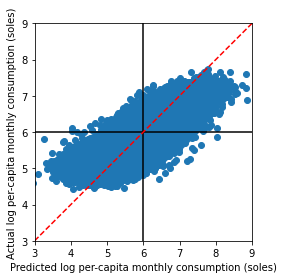

In [133]:
import matplotlib.pyplot as plt

lim_start = 3
lim_end = 9

g=plt.scatter(data_train.dropna(axis=0)["lnpercapitaconsumption"], y_predicted)
#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
plt.plot([lim_start, lim_end], [lim_start, lim_end], 'k--', color = 'r')
plt.hlines(6, lim_start, lim_end)
plt.vlines(6, lim_start, lim_end)
g.axes.set_xlabel('Predicted log per-capita monthly consumption (soles)')
g.axes.set_ylabel('Actual log per-capita monthly consumption (soles)')
g.axes.axis('equal')
g.axes.axis('square')
plt.xlim([lim_start, lim_end])
plt.ylim([lim_start, lim_end])
